# **Customer Segmentation and Targeted Marketing Plan**

# **Import Required Libraries**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime

# **Load and Combine Dataset**

In [ ]:
# Load both sheets of the Excel file
file_path = "/content/online_retail_II.xlsx"

sheet1 = pd.read_excel(file_path, sheet_name='Year 2009-2010', engine='openpyxl')
sheet2 = pd.read_excel(file_path, sheet_name='Year 2010-2011', engine='openpyxl')

In [ ]:
# Combine both years
df = pd.concat([sheet1, sheet2])
df.shape

(1067371, 8)

# **Data Profiling**

In [ ]:
# Show first 5 rows
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# to show last 5 rows
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [ ]:
# to show random 5 row
df.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
15876,490712,22113,GREY HEART HOT WATER BOTTLE,4,2009-12-07 15:26:00,3.45,13148.0,United Kingdom
483096,577493,22563,HAPPY STENCIL CRAFT,4,2011-11-20 12:13:00,1.25,17323.0,United Kingdom
45364,493435,22100,SKULLS SQUARE TISSUE BOX,6,2010-01-04 12:57:00,1.25,13206.0,United Kingdom
248348,558811,22630,DOLLY GIRL LUNCH BOX,1,2011-07-04 11:11:00,2.46,NaN,United Kingdom
373696,525448,21363,HOME SMALL WOOD LETTERS,2,2010-10-05 14:05:00,4.95,16938.0,United Kingdom


In [ ]:
# show number of rows and columns present
df.shape

(1067371, 8)

In [ ]:
# show column names
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
# show datatypes
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,float64
Country,object


In [ ]:
# show datatype and non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [ ]:
# show count of unique values
df.nunique()

,0
Invoice,53628
StockCode,5305
Description,5698
Quantity,1057
InvoiceDate,47635
Price,2807
Customer ID,5942
Country,43


In [ ]:
# show number of non-missing (non-NaN) values in each column
df.count()

,0
Invoice,1067371
StockCode,1067371
Description,1062989
Quantity,1067371
InvoiceDate,1067371
Price,1067371
Customer ID,824364
Country,1067371


In [ ]:
# show summary statistics of numerical columns
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [ ]:
# show total no.of duplicate values
df.duplicated().sum()

np.int64(34335)

In [ ]:
# show no.of null values
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


# **Data Cleaning**

In [ ]:
# Drop rows with missing Customer ID or Description
df = df.dropna(subset=['Customer ID', 'Description'])

In [ ]:
# Remove negative or cancelled transactions (negative quantities)
df = df[df['Quantity'] > 0]

In [ ]:
# Create a TotalAmount column
df['TotalAmount'] = df['Quantity'] * df['Price']

In [ ]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.shape

(805620, 9)

# **Feature Creation for Clustering**

In [ ]:
# Latest purchase date in dataset
latest_date = df['InvoiceDate'].max()
latest_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Aggregate data by Customer ID
customer_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency (number of invoices)
    'TotalAmount': 'sum'   # Monetary (total spending)
}).reset_index()

In [ ]:
customer_df

,Customer ID,InvoiceDate,Invoice,TotalAmount
0,12346.0,325,12,77556.46
1,12347.0,1,8,5633.32
2,12348.0,74,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,309,1,334.40
...,...,...,...,...
5876,18283.0,3,22,2736.65
5877,18284.0,431,1,461.68
5878,18285.0,660,1,427.00
5879,18286.0,476,2,1296.43


In [ ]:
# Rename columns
customer_df.rename(columns={'InvoiceDate': 'Recency',
                            'Invoice': 'Frequency',
                            'TotalAmount': 'Monetary'}, inplace=True)

In [ ]:
customer_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,12,77556.46
1,12347.0,1,8,5633.32
2,12348.0,74,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,309,1,334.40


In [ ]:
# Remove extreme outliers to improve clustering
for col in ['Recency', 'Frequency', 'Monetary']:
    q1 = customer_df[col].quantile(0.01)
    q3 = customer_df[col].quantile(0.99)
    customer_df = customer_df[(customer_df[col] >= q1) & (customer_df[col] <= q3)]

customer_df.shape

(5650, 4)

In [ ]:
# Standardize numerical columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_df[['Recency', 'Frequency', 'Monetary']])

scaled_df = pd.DataFrame(scaled_features, columns=['Recency', 'Frequency', 'Monetary'])

# **Elbow Method (to find best K)**

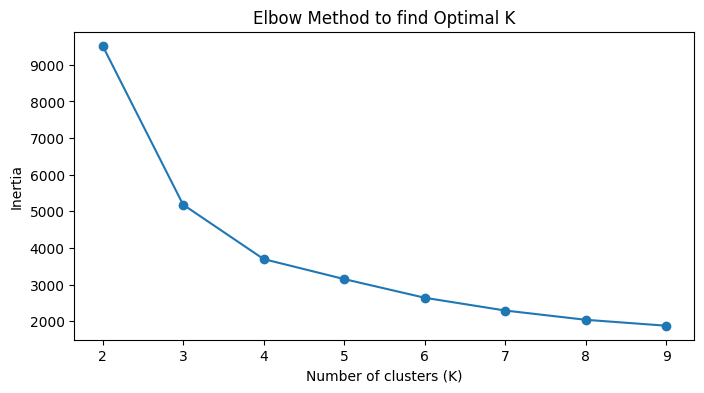

In [ ]:
# Elbow Method to choose the number of clusters
inertia = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method to find Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

# **K-Means Clustering**

In [ ]:
# Choose K based on the elbow plot
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_df)

customer_df.head()

,Customer ID,Recency,Frequency,Monetary,Cluster
1,12347.0,1,8,5633.32,2
2,12348.0,74,5,2019.40,1
3,12349.0,18,4,4428.69,2
4,12350.0,309,1,334.40,0
5,12351.0,374,1,300.93,0


In [ ]:
# Analyze average values for each cluster
cluster_summary = customer_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'Count'}).reset_index()

cluster_summary

,Cluster,Recency,Frequency,Monetary,Count
0,0,460.764739,2.048387,652.325379,1798
1,1,82.894327,3.430108,1030.775330,2697
2,2,53.326304,11.609323,4468.899996,901
3,3,32.822835,25.066929,11277.822248,254


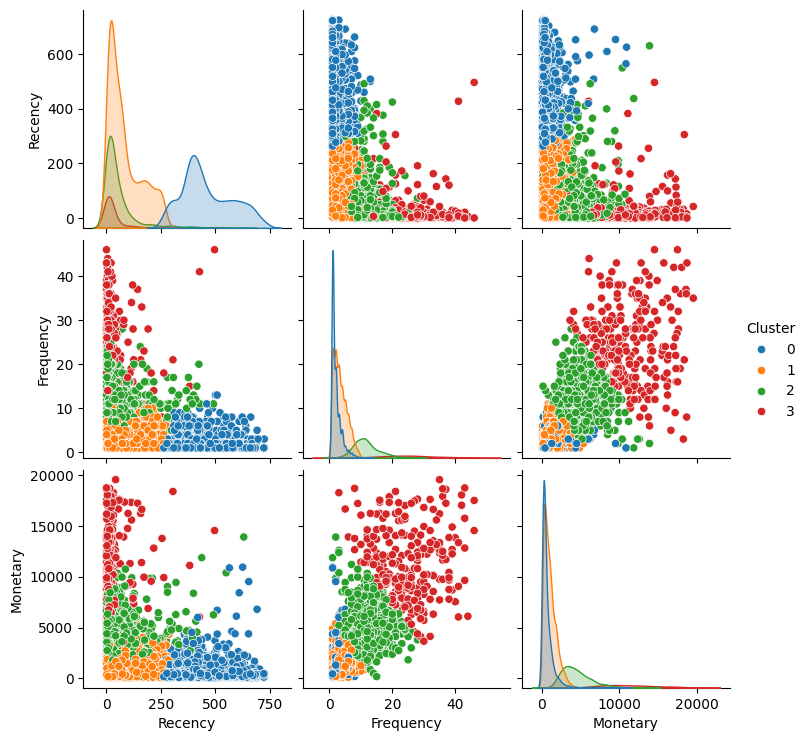

In [ ]:
# Visualize clusters using pairplot
sns.pairplot(customer_df, vars=['Recency', 'Frequency', 'Monetary'], hue='Cluster', palette='tab10')
plt.show()

# **Customer Personas and Marketing messages**

  **Customer Personas:**

  0:Occasional Buyers - Many customers with few purchases, low frequency and spending, and medium recency. They buy sometimes but not regularly.

  1:Inactive Customers - High recency (purchased long ago), very low frequency and spending. Need reactivation campaigns.

  2:Active Regular Shoppers - Moderate spending and frequency, recent purchases. These are growing, loyal customers.

  3:Premium Loyal Customers - High frequency, high spending, and very recent purchases. Most valuable segment.

**Marketing Messages**

 **Premium Loyal Customers:**

        "Thank you for being one of our most valued customers! Enjoy early access to new arrivals.",

        "As a VIP member, you get 20% off on your next purchase — our way of saying thanks!",

        "We appreciate your loyalty! Don’t miss our exclusive premium rewards this weekend."
    
  **Active Regular Shoppers:**

        "You’re doing great! Earn double reward points on your next order.",

        "Complete your next purchase and unlock a special membership level.",

        "We picked some products based on your favorite categories — check them out!"
   
  **Occasional Buyers:**
  
        "Found something you liked? Here’s a 15% discount to help you decide!",

        "Haven’t visited in a while — explore our bestsellers curated just for you.",

        "Join our reward program to get personalized offers every month."
    
  **Inactive Customers:**

        "We miss you! Come back with a 25% off coupon — valid this week only.",

        "It’s been a while since your last purchase — discover what’s new in our store.",

        "Your account is still active! Reactivate your shopping journey with free shipping."

**MARKETING STRATEGY — CUSTOMER SEGMENTATION BASED**


**1.Premium Loyal Customers (Cluster 3)**

   • Strategy: Exclusive loyalty rewards, early access to new collections, VIP programs.

   • Goal: Retain top customers and increase repeat purchases.

   • ROI Impact: High — less marketing cost per sale, more lifetime value.


**2.Active Regular Shoppers (Cluster 2)**

   • Strategy: Targeted product recommendations, reward points, limited-time offers.

   • Goal: Convert them into premium customers.

   • ROI Impact: Medium to High — increased conversion with moderate cost.


**3.Occasional Buyers (Cluster 0)**

   • Strategy: Personalized reminders, 10–15% discount emails, product recommendations.

   • Goal: Increase buying frequency.

   • ROI Impact: Medium — boosts purchase rate without high marketing spend.


**4.Inactive Customers (Cluster 1)**

   • Strategy: Win-back campaigns, strong discount offers, reactivation emails.

   • Goal: Bring back lost customers.

   • ROI Impact: Medium — low initial conversion but adds long-term value if reactivated.


**OVERALL STRATEGY**

   - Focus marketing budgets on high and medium-value segments.
   - Use segmentation insights to personalize emails, offers, and ads.
   - Measure ROI using metrics like repeat purchase rate, average order value, and churn rate.
   

**EXPECTED BENEFITS**

   • Better targeting → higher conversion rate.

   • Efficient use of marketing budget → improved ROI.

   • Stronger customer loyalty and brand engagement.